## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
var_list = ['year', 'wrkstat', 'wrkslf', 'hrs2', 'prestige', 'commute', 'occ10', 'indus10', 'marital', 'agewed', 'prestg80', 'spwrksta', 'spocc10', 'sphrs2']

# year = GSS year for this respondent
# wrkstat = labor force status
# wrkslf = self-emp or works for somebody
# hrs2 = number of hours usually work a week
# prestige = occupational prestige score
# commute = travel time to work
# occ10 = census occupation code
# indus10 = industry code
# marital = marital status
# agewed = age when first married
# prestg80 = spouse's occupational pretige score
# spwrksta = spouse labor force status
# spocc10 = spouse census occupation code
# sphrs2 = number of hrs spouse usually works a week


output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to

phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode

for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode


https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

I chose to create a data set with thirteen variables, to hopefully collect more data than I'll actually end up needing. With that being said, I'm writing this before starting any analysis so I may end up adding data as well or swapping certain variables.

I mainly want to determine relationships between different work-related variables. Do self-employed individuals spend more or less hours working per week on average? Does an increased commute time lead to more instances of part-time work and/or less or more time spent working? Do jobs with higher perceived prestige require more or less work hours on average? What are the jobs with the highest and lowest prestige scores?

Additionally, based on today's economy I want to see if in recent years respondants have been working more and more to keep up with inflataion to make a time series plot. Though I'm not sure as of right now if the data consists of responses from just 2022 or if it's from multiple years.

Finally, I want to see how marriage impacts the types of jobs people work and how much they work depending on how old they were when they got married.

In [ ]:
df = pd.read_csv('selected_gss_data.csv')
df.head()


,year,wrkstat,wrkslf,hrs2,prestige,commute,occ10,indus10,marital,agewed,prestg80,spwrksta,spocc10,sphrs2
0,1972,working full time,someone else,NaN,50.0,NaN,"wholesale and retail buyers, except farm products",5170.0,never married,NaN,NaN,NaN,NaN,NaN
1,1972,retired,someone else,NaN,45.0,NaN,first-line supervisors of production and opera...,6470.0,married,21.0,NaN,keeping house,NaN,NaN
2,1972,working part time,someone else,NaN,44.0,NaN,real estate brokers and sales agents,7070.0,married,20.0,NaN,working full time,"property, real estate, and community associati...",NaN
3,1972,working full time,someone else,NaN,57.0,NaN,accountants and auditors,5170.0,married,24.0,NaN,working full time,"tax examiners and collectors, and revenue agents",NaN
4,1972,keeping house,someone else,NaN,40.0,NaN,telephone operators,6680.0,married,22.0,NaN,"with a job, but not at work because of tempora...","rolling machine setters, operators, and tender...",NaN


In [ ]:
# Do self-employed individuals spend more or less hours working per week on average?

self_employed = df[df['wrkslf'] == 'self-employed']
not_self_employed = df[df['wrkslf'] == 'someone else']

avg_hours_self_employed = self_employed['hrs2'].mean()
avg_hours_not_self_employed = not_self_employed['hrs2'].mean()

print(f"Average hours worked by self-employed: {avg_hours_self_employed}")
print(f"Average hours worked by not-self-employed: {avg_hours_not_self_employed}")

# Based on the calculated averages, those who answered the survey and are
# not self-employed work 0.04 hours (2.4 minutes) more than those who are self-employed


Average hours worked by self-employed: 39.16267942583732
Average hours worked by not-self-employed: 39.20353238015139


In [ ]:
# Does an increased commute time lead to more instances of part-time work and/or less or more time spent working?

df['commute'] = pd.to_numeric(df['commute'], errors='coerce')

part_time = df[df['wrkstat'] == 'working part time']
full_time = df[df['wrkstat'] == 'working full time']

part_time_commute = part_time['commute'].mean() if not part_time.empty else None
full_time_commute = full_time['commute'].mean() if not full_time.empty else None

print(f"Average commute time for part-time workers: {part_time_commute}")
print(f"Average commute time for full-time workers: {full_time_commute}")

# It looks as though full-time workers actually spend more time commuting to work
# This is interestnig as I initially assumed that those with part-time jobs would
# travel further to work because they would not be doing it every day of the week
# However it would also make sense that those who have a stable full-time job are
# more willing to spend more time traveling because their job is more stable, and
# not something they do on the side to earn additional income


Average commute time for part-time workers: 17.02112676056338
Average commute time for full-time workers: 20.008836524300442


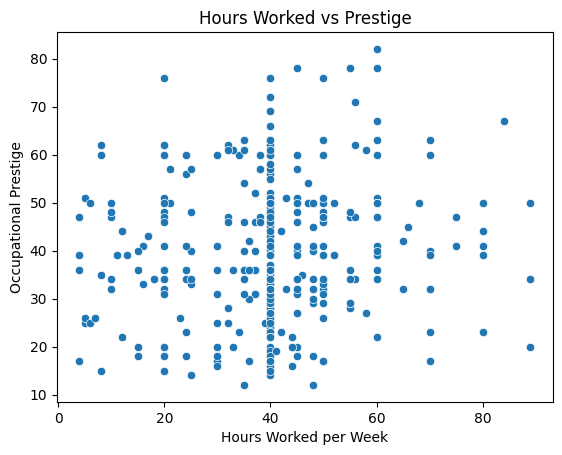

In [ ]:
# Do jobs with higher perceived prestige require more or less work hours on average?

import seaborn as sns
sns.scatterplot(x = 'hrs2', y = 'prestige', data = df)
plt.title('Hours Worked vs Prestige')
plt.xlabel('Hours Worked per Week')
plt.ylabel('Occupational Prestige')
plt.show()

# Based on the scatter plot there does not seem to be any real correlation between
# hours worked per week and prestige score, however it is also difficult to tell
# because there are many more instances of individuals that work 40 hours or less
# That being said, the highest prestige score was given to an indivdual who worked
# 60 hours per week on average


In [ ]:
# What are the jobs with the highest and lowest prestige scores?

highest_prestige = df[df['prestige'] == df['prestige'].max()]
lowest_prestige = df[df['prestige'] == df['prestige'].min()]

print(f'Highest prestige job:', highest_prestige )
print(f'Lowest prestige job:', lowest_prestige)

# The highest prestige jobs were listed as healthcare workers, which to me is unsurprising
# The lowest prestige jobs were listed as maids, hairdressers, metal workers, truck drivers, etc.
# and this is more surprising to me because it just seems like such a wide array of jobs
# that are necessary for a functional society (metal workers and truck drivers)


Highest prestige job:        year                                            wrkstat         wrkslf  \
1585   1972                                            retired  self-employed   
2779   1973                                  working part time  self-employed   
3322   1974                                  working full time   someone else   
3552   1974                                  working full time  self-employed   
6643   1976                                  working full time  self-employed   
7152   1976                                  working full time  self-employed   
7967   1977                                  working full time  self-employed   
8564   1977                                  working full time   someone else   
9131   1978                                            retired  self-employed   
9212   1978                                            retired  self-employed   
9696   1978                                  working full time   someone else   
10331 

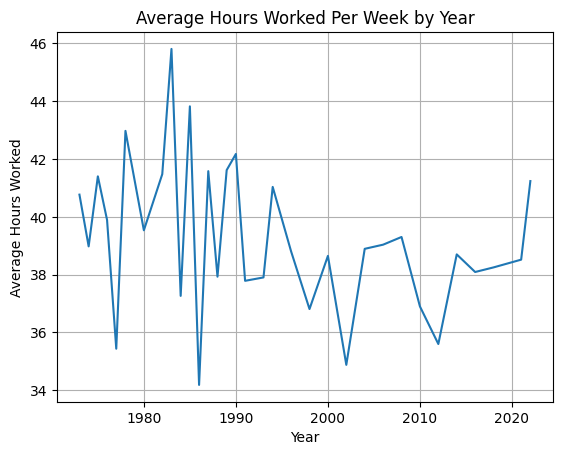

In [ ]:
# Are indivdiuals working more to keep up with inflation?

avg_hours_by_year = df.groupby('year')['hrs2'].mean()

plt.plot(avg_hours_by_year.index, avg_hours_by_year.values)
plt.title('Average Hours Worked Per Week by Year')
plt.xlabel('Year')
plt.ylabel('Average Hours Worked')
plt.grid(True)
plt.show()

# It does seem that in recent years the number of hours worked have been increasing,
# though there was a steep peak around 1982, which corresponds to a time of severe recession
# during which the unemployment rate was 10.8%
# I would be interested in learning how high the hours worked will rise in the future


marital
divorced         39.946078
married          39.567604
never married    38.827160
separated        38.039216
widowed          36.026667
Name: hrs2, dtype: float64


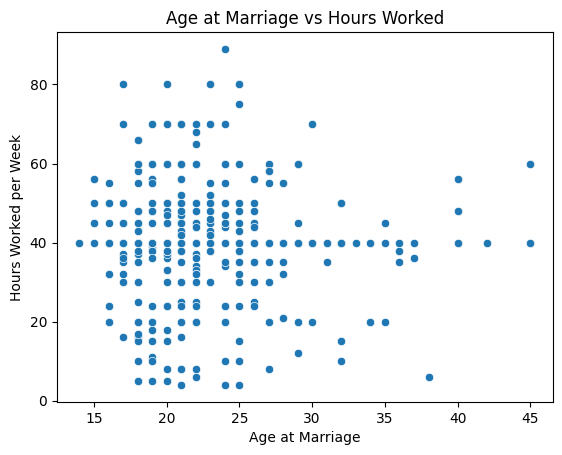

In [ ]:
marital_status_hours = df.groupby('marital')['hrs2'].mean()
print(marital_status_hours)

sns.scatterplot(x = 'agewed', y = 'hrs2', data = df)
plt.title('Age at Marriage vs Hours Worked')
plt.xlabel('Age at Marriage')
plt.ylabel('Hours Worked per Week')
plt.show()

# Interestingly, there does seem to be some relationship between age of marriage and hours worked
# Those who were married at a young age work more than those who married at an older age with
# a peak occurring between 20-25 years old


Based on the calculated averages, those who answered the survey and are
not self-employed work 0.04 hour more than those who are self-employed. A quick calculation shows that 0.04 * 60 = 2.4 minutes. I found this to be kind of interesting, as I had thought that those who were self-employed would actually work more. For example, most small business owners run their business, promote their business, etc. Though, I suppose in a time where many people can work at home, create youtube/instagram/tik tok videos and become influencers, work as advertisers and work on their own schedule that they would be able to work less. Though, it is important to note that it is not on the degree of hours or days but just 2.4 minutes.

It looks as though full-time workers actually spend more time commuting to work.
I initially assumed that those with part-time jobs would travel further to work because depending on how they work part-time, they might not be going in the normal five day work week. However, it would also make sense that those who have a stable full-time job are more willing to spend more time traveling because their job is more stable (in theory) , and not something they do on the side to earn additional income.

Based on the scatter plot there does not seem to be any real correlation between
hours worked per week and prestige score, however it is also difficult to tell
because there are many more instances of individuals that work 40 hours or less. This could skew the results or any relationship that I might think I see.That being said, the highest prestige score was given to an indivdual who worked
60 hours per week on average.

The highest prestige jobs were listed as healthcare workers, which is very unsurprising to me. Though, the lowest prestige jobs were listed as maids, hairdressers, metal workers, truck drivers, etc. This was not what I expected, though in all honesty I'm not really sure what I did expect, because it just seems like such a wide array of jobs that are necessary for a functional society, like metal workers and truck drivers. While they are jobs that many people may not want to do, it is still imperative that someone do them, I can't imagine what would happen if there were no truck drivers to deliver goods across the US or metal workers to build the towers/skyscrapers in our cities.

From the time series, it does seem that in recent years the number of hours worked have been increasing. There was also a steep peak around 1982, which corresponds to a time of severe recession during which the unemployment rate was 10.8%. While I first thought that this should mean that there would be a lower number of hours since many, many Americans would not have a job, it could correspond to a change in demand. Since many people would have lost their jobs, those who were still able to work may have put in more hours, not even as a response to inflation, but in order to try and keep their job. I would be interested in learning how high the hours worked will rise in the future, especially considering how bad inflation has been recently.

Finally, there does seem to be some relationship between age of marriage and hours worked. Those who were married at a young age work more than those who married at an older age with a peak occurring between 20-25 years old. This could be because of a lack of education, requiring younger married individuals to work more labor-related jobs requiring longer hours. Comparatively, it could also be because much older married indivduals are retired. Overall, there are many potential reasons why there is this distribution.